Imports, Loads & EDA запускаются в начале в обязательном порядке, остальные разделы можно в произвольном

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore') 

# Loads

In [ ]:
nineteen = pd.read_csv('/content/drive/MyDrive/Severstahl/agents2019.csv') # сюда впишите путь до файла с исходными за данными за 2019 г.
nineteen.drop('Unnamed: 0', axis=1, inplace=True)
nineteen.head(1)

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                0                            0                          0.0   

   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
0                                                  0   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                                0.0   

   Кол-во раз ПДЗ за 2019 год, шт.  2016, Нематериальные активы, RUB  \
0                                0                      2.895541e+06   

   2017, Нематериальные активы, RUB  2018, Нематериальные активы, RUB  \
0                      6.245860e+06                      9.050955e+06   

   2016, Основные средства , RUB  ...  2018, Выручка, RUB  \
0                   1.889724e+09  ...        3.703952e+10   

   2016, Себестоимость продаж, RUB  2017, Себестоимость продаж, RUB  \
0                     2.156814e+10                     3.335443e+10   

   2018, Себестоимость продаж, RUB  \
0                     3.438313e+10   

   2016, Прибыль (убыток) до налогообложения , RUB  \
0                                     3.179697e+09   

   2017, Прибыль (убыток) до налогообложения , RUB  \
0                                     6.167667e+09   

   2018, Прибыль (убыток) до налогообложения , RUB  \
0                                     7.461828e+08   

   2016, Прибыль (убыток) от продажи, RUB  \
0                            3.280355e+09   

   2017, Прибыль (убыток) от продажи, RUB  \
0                            6.200120e+09   

   2018, Прибыль (убыток) от продажи, RUB  
0                            8.716191e+08  

[1 rows x 54 columns]

In [ ]:
twenty = pd.read_csv('/content/drive/MyDrive/Severstahl/agents2020.csv') # сюда впишите путь до файла с исходными за данными за 2020 г.
# twenty.drop('Unnamed: 0', axis=1, inplace=True)
twenty.head(1)

Наименование ДП Факт. 1 Факт. 2 Факт. 3 Факт. 4 Факт. 5 Факт. 6 Факт. 7  \
0                0       Х       Х       Х       Х       Х       Х       Х   

  Факт. 8 Факт. 9  ... 2018, Себестоимость продаж, RUB  \
0       Х       Х  ...                    3.438313e+10   

  2019, Себестоимость продаж, RUB  \
0                    2.673481e+10   

  2016, Прибыль (убыток) до налогообложения , RUB  \
0                                    3.179697e+09   

  2017, Прибыль (убыток) до налогообложения , RUB  \
0                                    6.167667e+09   

  2018, Прибыль (убыток) до налогообложения , RUB  \
0                                    7.461828e+08   

  2019, Прибыль (убыток) до налогообложения , RUB  \
0                                    3.603784e+09   

  2016, Прибыль (убыток) от продажи, RUB  \
0                           3.280355e+09   

  2017, Прибыль (убыток) от продажи, RUB  \
0                           6.200120e+09   

  2018, Прибыль (убыток) от продажи, RUB  \
0                           8.716191e+08   

  2019, Прибыль (убыток) от продажи, RUB  
0                           3.658634e+09  

[1 rows x 131 columns]

In [ ]:
twentyone = pd.read_csv('/content/drive/MyDrive/Severstahl/agents2021.csv') # сюда впишите путь до файла с исходными за данными за 2021 г.
twentyone.drop('Unnamed: 0', axis=1, inplace=True)
twentyone.head(1)

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                0                            0                          0.0   

   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
0                                                  0   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                                0.0   

   Кол-во раз ПДЗ за 2019 год, шт.  Макс. ПДЗ за 2020 год, дней  \
0                                0                           10   

   Сред. ПДЗ за 2020 год, дней  \
0                          6.4   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  \
0                                                  4   

   Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.  ...  Факт 7  Факт 12  \
0                                       2.229696e+06  ...     NaN      NaN   

   Факт 14 Факт 15  Факт 16  Итого  ПДЗ 1-30  ПДЗ 31-90  ПДЗ 91-365  \
0      NaN     NaN      NaN    5.0         0          0           1   

   ПДЗ более 365  
0              1  

[1 rows x 135 columns]

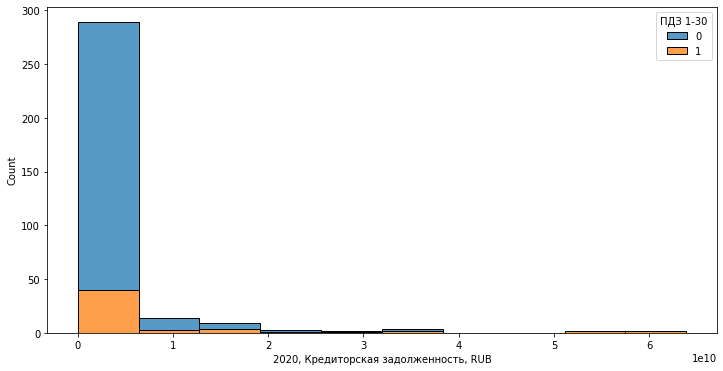

In [ ]:
plt.figure(figsize=(12, 6)) # Пробная визуализация
sns.histplot(data=twentyone, x='2020, Кредиторская задолженность, RUB', bins=10, hue='ПДЗ 1-30', multiple="stack")

plt.show()

# EDA и подготовка данных
Все логические изыскания осались в первом блокноте. Это финальный вариант, тут по сути осталась подготовка данных для работы моделей МО (машинное обучение здесь и далее)

## 2020

In [ ]:
# Создаем дф с факторами
factors_2020 = twenty[twenty.columns[1:61]]

twenty.drop(factors_2020.columns, axis=1, inplace=True)
twenty['Итого'] = twenty['Итого'].fillna(0) # имеем в виду, что "Итого" это суммарный вес 60 факторов
twenty.head(3)

Наименование ДП  Итого  Макс. ПДЗ за 2020 год, дней  \
0                0   10.0                           10   
1                1   20.0                            4   
2                2   40.0                            6   

   Сред. ПДЗ за 2020 год, дней  \
0                     6.400000   
1                     4.000000   
2                     5.333333   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  \
0                                                  4   
1                                                  0   
2                                                  2   

   Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.  \
0                                       2.229696e+06   
1                                       0.000000e+00   
2                                       3.759242e+06   

   Кол-во раз ПДЗ за 2020 год, шт.  2016, Нематериальные активы, RUB  \
0                                5                      2.895541e+06   
1                                1                      0.000000e+00   
2                                3                      2.468153e+06   

   2017, Нематериальные активы, RUB  2018, Нематериальные активы, RUB  ...  \
0                      6.245860e+06                      9.050955e+06  ...   
1                      3.885350e+04                      3.439490e+04  ...   
2                      1.288025e+07                      8.694904e+06  ...   

   2018, Себестоимость продаж, RUB  2019, Себестоимость продаж, RUB  \
0                     3.438313e+10                     2.673481e+10   
1                     4.169796e+08                     5.349955e+08   
2                     2.316724e+09                     2.460679e+09   

   2016, Прибыль (убыток) до налогообложения , RUB  \
0                                     3.179697e+09   
1                                     1.212357e+07   
2                                     5.026662e+08   

   2017, Прибыль (убыток) до налогообложения , RUB  \
0                                     6.167667e+09   
1                                     6.944586e+06   
2                                     3.644229e+08   

   2018, Прибыль (убыток) до налогообложения , RUB  \
0                                     7.461828e+08   
1                                     4.480064e+07   
2                                     8.552994e+07   

   2019, Прибыль (убыток) до налогообложения , RUB  \
0                                     3.603784e+09   
1                                     8.747516e+07   
2                                    -6.456439e+08   

   2016, Прибыль (убыток) от продажи, RUB  \
0                            3.280355e+09   
1                            1.630064e+07   
2                            4.148586e+08   

   2017, Прибыль (убыток) от продажи, RUB  \
0                            6.200120e+09   
1                            1.109172e+07   
2                            1.611318e+08   

   2018, Прибыль (убыток) от продажи, RUB  \
0                            8.716191e+08   
1                            5.135732e+07   
2                           -9.298981e+07   

   2019, Прибыль (убыток) от продажи, RUB  
0                            3.658634e+09  
1                            9.411019e+07  
2                           -1.207210e+08  

[3 rows x 71 columns]

In [ ]:
# Оставляем экономику только за 2019 г.
droplist = []
for i in twenty.columns[7:]:
  if '2019' not in i:
    droplist.append(i)

twenty_only_2019 = twenty.drop(droplist, axis=1)

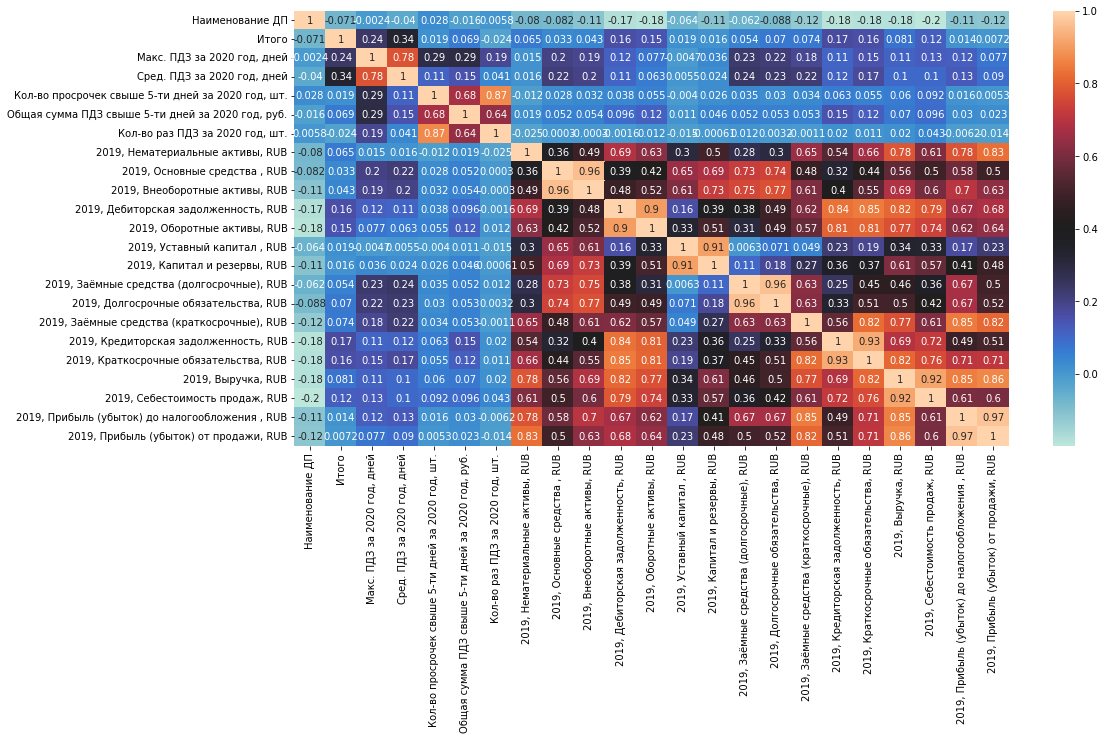

In [ ]:
# Теперь можно построить корреляционную диаграмму и разом взглянуть на зависимости экономических показателей от сумм факторов. Если зависимость есть конечно.
plt.figure(figsize=(16, 8))
sns.heatmap(twenty_only_2019.corr(), annot=True, cmap='icefire')
plt.show()
# Что видим? Корреляция умеренная только для столбца "Сред. ПДЗ за 2020 год, дней". Можно сказать с натяжкой, что корреляция прослеживается и для столбца
# "Макс. ПДЗ за 2020 год, дней" (Помним, что по Пирсону умеренная корреляция начинается от 0.3). Так или иначе видим, что те 60 факторов, их результирующая, влияет
# на таргетный столбец. Правильно, что от идеи факторов не отказались и в 2021 г.
# Экономические же показатели довольно ощутимо коррелируют друг с другом, что вряд ли удивительно, но вот со всем, что касается ПДЗ корреляция слабая.
# Блок ПДЗ хорошо коррелирует сам с собой, что тоже не удивительно.

# Факторы с корреляцией между ПДЗ и "Итого"(совокупность факторов) визуализированны выше, там также зависимость видна.

In [ ]:
# Нет данных за 2019 год в дф за 2020, но в предсказаниях мы не должны использовать данные актуального года. Поэтому нужно к датасету за 20 г приклеить кое-что из года 19:
glue = nineteen[['Наименование ДП', 'Макс. ПДЗ за 2019 год, дней', 'Сред. ПДЗ за 2019 год, дней', 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.', 'Кол-во раз ПДЗ за 2019 год, шт.']]

twenty = glue.merge(twenty, on='Наименование ДП', how='left') # теперь в дф 2020 есть данные о ПДЗ за 2019
twenty.head(1)

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                0                            0                          0.0   

   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
0                                                  0   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                                0.0   

   Кол-во раз ПДЗ за 2019 год, шт.  Итого  Макс. ПДЗ за 2020 год, дней  \
0                                0   10.0                           10   

   Сред. ПДЗ за 2020 год, дней  \
0                          6.4   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  ...  \
0                                                  4  ...   

   2018, Себестоимость продаж, RUB  2019, Себестоимость продаж, RUB  \
0                     3.438313e+10                     2.673481e+10   

   2016, Прибыль (убыток) до налогообложения , RUB  \
0                                     3.179697e+09   

   2017, Прибыль (убыток) до налогообложения , RUB  \
0                                     6.167667e+09   

   2018, Прибыль (убыток) до налогообложения , RUB  \
0                                     7.461828e+08   

   2019, Прибыль (убыток) до налогообложения , RUB  \
0                                     3.603784e+09   

   2016, Прибыль (убыток) от продажи, RUB  \
0                            3.280355e+09   

   2017, Прибыль (убыток) от продажи, RUB  \
0                            6.200120e+09   

   2018, Прибыль (убыток) от продажи, RUB  \
0                            8.716191e+08   

   2019, Прибыль (убыток) от продажи, RUB  
0                            3.658634e+09  

[1 rows x 76 columns]

In [ ]:
# посчитаем разницу и сохраним ее в отдельные столбцы, при этом удалим все, что связано с 2020 г.
econom_list = ['Нематериальные активы, RUB', 'Основные средства , RUB', 'Внеоборотные активы, RUB', 'Дебиторская задолженность, RUB', 'Оборотные активы, RUB', 'Уставный капитал , RUB',
          'Капитал и резервы, RUB', 'Заёмные средства (долгосрочные), RUB', 'Долгосрочные обязательства, RUB', 'Заёмные средства (краткосрочные), RUB', 'Кредиторская задолженность, RUB',
          'Краткосрочные обязательства, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB', 'Прибыль (убыток) до налогообложения , RUB', 'Прибыль (убыток) от продажи, RUB']
          
for i in econom_list:
  twenty[i] = twenty['2019,' + ' ' + i] - twenty['2016,' + ' ' + i]

# удалим промежуточные экономические столбцы:
droplist = []
for i in twenty.columns[7:76]:
  if '2019' not in i:
    droplist.append(i)

twenty_only_2019 = twenty.drop(droplist, axis=1)
twenty_only_2019.head(1)

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                0                            0                          0.0   

   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
0                                                  0   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                                0.0   

   Кол-во раз ПДЗ за 2019 год, шт.  Итого  2019, Нематериальные активы, RUB  \
0                                0   10.0                      9.885987e+06   

   2019, Основные средства , RUB  2019, Внеоборотные активы, RUB  ...  \
0                   3.606103e+09                    3.737611e+09  ...   

   Капитал и резервы, RUB  Заёмные средства (долгосрочные), RUB  \
0            2.192015e+09                                   0.0   

   Долгосрочные обязательства, RUB  Заёмные средства (краткосрочные), RUB  \
0                     2.660573e+07                                    0.0   

   Кредиторская задолженность, RUB  Краткосрочные обязательства, RUB  \
0                    -6.010777e+08                     -5.872828e+08   

   Выручка, RUB  Себестоимость продаж, RUB  \
0  5.670574e+09               5.166668e+09   

   Прибыль (убыток) до налогообложения , RUB  Прибыль (убыток) от продажи, RUB  
0                               4.240873e+08                      3.782783e+08  

[1 rows x 39 columns]

## 2021

Для 2021 провернем тот же трюк, что и для 2020, а заодно посмотрим оказывают ли влияние на таргетные переменные новые столбцы, которых не было в предыдущих годах.

In [ ]:
# Для начала удалим отдельные факторы, оставим лишь их совокупность:
droplist = []
for i in twentyone.columns:
  if 'Факт' in i:
    droplist.append(i)

twentyone = twentyone.drop(droplist, axis=1)
twentyone.head(1)

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                0                            0                          0.0   

   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
0                                                  0   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                                0.0   

   Кол-во раз ПДЗ за 2019 год, шт.  Макс. ПДЗ за 2020 год, дней  \
0                                0                           10   

   Сред. ПДЗ за 2020 год, дней  \
0                          6.4   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  \
0                                                  4   

   Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.  ...  \
0                                       2.229696e+06  ...   

   2016, Прибыль (убыток) от продажи, RUB  \
0                            3.280355e+09   

   2017, Прибыль (убыток) от продажи, RUB  \
0                            6.200120e+09   

   2018, Прибыль (убыток) от продажи, RUB  \
0                            8.716191e+08   

  2019, Прибыль (убыток) от продажи, RUB  \
0                           3.658634e+09   

   2020, Прибыль (убыток) от продажи, RUB  Итого  ПДЗ 1-30  ПДЗ 31-90  \
0                            5.971943e+09    5.0         0          0   

   ПДЗ 91-365  ПДЗ более 365  
0           1              1  

[1 rows x 99 columns]

In [ ]:
# так же поступим и экономическими показателями, оставим только за последний год:
droplist = []
for i in twentyone.columns[14:94]:
  if '2020' not in i:
    droplist.append(i)

twentyone_only_2020 = twentyone.drop(droplist, axis=1)
twentyone_only_2020.head(1)

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                0                            0                          0.0   

   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
0                                                  0   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                                0.0   

   Кол-во раз ПДЗ за 2019 год, шт.  Макс. ПДЗ за 2020 год, дней  \
0                                0                           10   

   Сред. ПДЗ за 2020 год, дней  \
0                          6.4   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  \
0                                                  4   

   Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.  ...  \
0                                       2.229696e+06  ...   

   2020, Краткосрочные обязательства, RUB  2020, Выручка, RUB  \
0                            3.451186e+09        2.794788e+10   

   2020, Себестоимость продаж, RUB  \
0                     2.058317e+10   

  2020, Прибыль (убыток) до налогообложения , RUB  \
0                                    5.586341e+09   

   2020, Прибыль (убыток) от продажи, RUB  Итого  ПДЗ 1-30  ПДЗ 31-90  \
0                            5.971943e+09    5.0         0          0   

   ПДЗ 91-365  ПДЗ более 365  
0           1              1  

[1 rows x 35 columns]

In [ ]:
# Сделаем категориальным "Статус" и добавим столбец с категориями ПДЗ по сроку просрочки:
twentyone_only_2020['Итого'].fillna(0, inplace=True) # Заменим в столбце пропуски нулями.

In [ ]:
twentyone_only_2020['Статус'] = twentyone_only_2020['Статус'].astype('category') # категоризируем "Статус"
twentyone_only_2020['Статус'] = twentyone_only_2020['Статус'].cat.codes

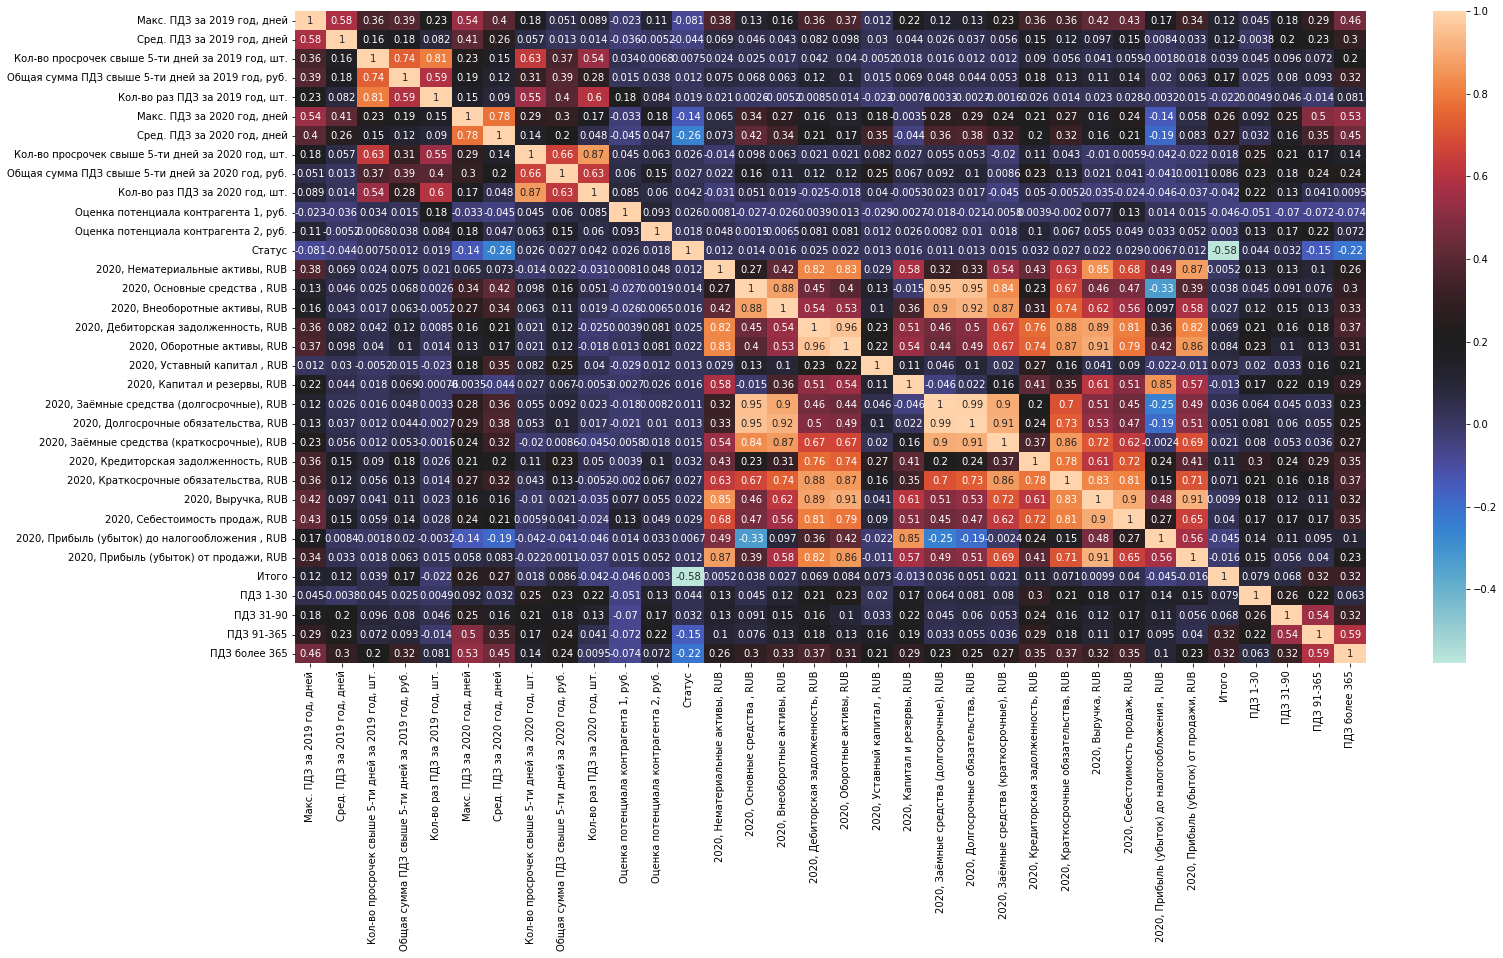

In [ ]:
diag = twentyone_only_2020.drop('Наименование ДП', axis=1)

plt.figure(figsize=(24, 12))
sns.heatmap(diag.corr(), annot=True, cmap='icefire')
plt.show()

# Здесь очень интересные связи отдельных экономических столбцов с макс. и средн. ПДЗ! В будущем именно эти столбцы можно использовать в построении модели предсказаний.
# Однако, насколько я помню, макс. ПДЗ по условию кейса предсказывать не надо.
# Видим также, что сумма факторов ("Итого") влияют на ПДЗ с большим сроком: от 91 дня. Влияние "Итого" на макс. и средн. ПДЗ немного снизилось по сравнению с 2020 годом и теперь 
# не дотягивает до 0.3 - формальной границы умеренного влияния. Нововведенная колонка "Статус" ни на что не влияет, ее мы точно не будем использовать в прогнозах.
# Можно также заметить, что есть сильная корреляция (> 0.5) между макс. ПДЗ в 2019 и 2020 гг, иными словами правлильно говорил Юнг, что лучшим способом предсказать будущее поведение
# является поведение прошлое =).

# Интересным является и то, что абсолютно все экономические факторы оказывают умеренное влияние на "ПДЗ более 365" за исключением "2020, Прибыль (убыток) до налогообложения , RUB"
# То есть при построении модели для этого таргета, мы будем пользоваться всеми эконом. столбцами, за исключением указанного.

# Для меньших же просрочек от 0 до 90 дней, экономические факторы напротив не оказываеют существенного влияния, за исключением столбца "2020, Кредиторская задолженность, RUB",
# что выглядит вполне логичным. Делаем вывод, что гораздо легче на основании экономических данных прогнозировать крупные просрочки.

Добавляем в датасет за 2021 г. динимику экономических показателей за все года. В качестве динамики будем понимать разницу в значении показателя (признака) между 2020 и 2016 годом. Сейчас не будем переводить в нули и единицы, оставим только дф с разницей в числах

In [ ]:
# Для начала удалим из датасета за 2021 год экономические признаки промежуточных лет
econom_list = ['Нематериальные активы, RUB', 'Основные средства , RUB', 'Внеоборотные активы, RUB', 'Дебиторская задолженность, RUB', 'Оборотные активы, RUB', 'Уставный капитал , RUB',
          'Капитал и резервы, RUB', 'Заёмные средства (долгосрочные), RUB', 'Долгосрочные обязательства, RUB', 'Заёмные средства (краткосрочные), RUB', 'Кредиторская задолженность, RUB',
          'Краткосрочные обязательства, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB', 'Прибыль (убыток) до налогообложения , RUB', 'Прибыль (убыток) от продажи, RUB']

drops = []
for i in list(twentyone.columns)[14:94]:
  if '2016' not in i and '2020' not in i:
    drops.append(i)
drops
twentyone_dinamics = twentyone.drop(drops, axis=1)
twentyone_dinamics.head(1)

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                0                            0                          0.0   

   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
0                                                  0   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                                0.0   

   Кол-во раз ПДЗ за 2019 год, шт.  Макс. ПДЗ за 2020 год, дней  \
0                                0                           10   

   Сред. ПДЗ за 2020 год, дней  \
0                          6.4   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  \
0                                                  4   

   Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.  ...  \
0                                       2.229696e+06  ...   

   2020, Себестоимость продаж, RUB  \
0                     2.058317e+10   

   2016, Прибыль (убыток) до налогообложения , RUB  \
0                                     3.179697e+09   

   2020, Прибыль (убыток) до налогообложения , RUB  \
0                                     5.586341e+09   

  2016, Прибыль (убыток) от продажи, RUB  \
0                           3.280355e+09   

   2020, Прибыль (убыток) от продажи, RUB  Итого  ПДЗ 1-30  ПДЗ 31-90  \
0                            5.971943e+09    5.0         0          0   

   ПДЗ 91-365  ПДЗ более 365  
0           1              1  

[1 rows x 51 columns]

In [ ]:
# Создание динамики в числах
for i in econom_list:
  twentyone_dinamics[i] = twentyone_dinamics['2020,' + ' ' + i] - twentyone_dinamics['2016,' + ' ' + i]
twentyone_dinamics.head(10)

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                0                            0                     0.000000   
1                2                            7                     5.500000   
2                4                            2                     2.000000   
3                5                            0                     0.000000   
4                6                            0                     0.000000   
5                7                            8                     3.366197   
6                8                           14                     2.306122   
7                9                          124                    16.315068   
8               12                           88                     8.117647   
9               13                           14                     4.125000   

   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
0                                                  0   
1                                                  1   
2                                                  0   
3                                                  0   
4                                                  0   
5                                                  5   
6                                                  5   
7                                                 34   
8                                                 14   
9                                                  3   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                       0.000000e+00   
1                                       1.328253e+05   
2                                       0.000000e+00   
3                                       0.000000e+00   
4                                       0.000000e+00   
5                                       2.400858e+06   
6                                       2.922935e+06   
7                                       5.397366e+07   
8                                       4.074009e+06   
9                                       5.251434e+05   

   Кол-во раз ПДЗ за 2019 год, шт.  Макс. ПДЗ за 2020 год, дней  \
0                                0                           10   
1                                2                            6   
2                                2                            1   
3                                0                           21   
4                                0                            0   
5                               71                           18   
6                               49                            6   
7                               73                          211   
8                               34                           12   
9                                8                            5   

   Сред. ПДЗ за 2020 год, дней  \
0                     6.400000   
1                     5.333333   
2                     1.000000   
3                    17.666667   
4                     0.000000   
5                     6.882353   
6                     2.411765   
7                   103.388889   
8                     3.083333   
9                     2.230769   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  \
0                                                  4   
1                                                  2   
2                                                  0   
3                                                  5   
4                                                  0   
5                                                  7   
6                                                  1   
7                                                 16   
8                                                  5   
9                                                  0   

   Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.  ...  \
0                                       2.229696e+06  ...   
1                                   

In [ ]:
# на будущее: оставляем только экономическую динамику и экономику за последний год
dropes = []
for i in twentyone_dinamics.columns[14:46]:
  if '2020' not in i:
    dropes.append(i)
twentyone_dinamics = twentyone_dinamics.drop(dropes, axis=1)
list(twentyone_dinamics.columns)

['Наименование ДП',
 'Макс. ПДЗ за 2019 год, дней',
 'Сред. ПДЗ за 2019 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
 'Кол-во раз ПДЗ за 2019 год, шт.',
 'Макс. ПДЗ за 2020 год, дней',
 'Сред. ПДЗ за 2020 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
 'Кол-во раз ПДЗ за 2020 год, шт.',
 'Оценка потенциала контрагента 1, руб.',
 'Оценка потенциала контрагента 2, руб.',
 'Статус',
 '2020, Нематериальные активы, RUB',
 '2020, Основные средства , RUB',
 '2020, Внеоборотные активы, RUB',
 '2020, Дебиторская задолженность, RUB',
 '2020, Оборотные активы, RUB',
 '2020, Уставный капитал , RUB',
 '2020, Капитал и резервы, RUB',
 '2020, Заёмные средства (долгосрочные), RUB',
 '2020, Долгосрочные обязательства, RUB',
 '2020, Заёмные средства (краткосрочные), RUB',
 '2020, Кредиторская задолженность, RUB',
 '2020, Краткосрочные обязательства, RUB',
 '

## Класс предсказателя

In [ ]:
# Класс классификатора-предсказателя

class Predictor:

  def __init__(self, features, target, test_size):
    self.features = features
    self.target = target
    self.skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
    self.rfc_params = {'n_estimators': range(10, 100, 10), 'min_samples_leaf': range(1, 5)}
    self.lr_params = {'C': np.arange(0.5, 1, 0.1)}
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.features, self.target, test_size=test_size, random_state=17)

  def RandomForest(self):
    rfc = RandomForestClassifier(random_state=17)
    rfc_clf = GridSearchCV(rfc, self.rfc_params, cv=self.skf)
    rfc_clf.fit(self.x_train, self.y_train)
    self.pred_rfc = rfc_clf.predict(self.x_test)
    accuracy_rfc = accuracy_score(self.y_test, self.pred_rfc)
    print(f'Точность СлучайногоЛеса: {accuracy_rfc}')
    return rfc_clf # вернем обученый алгоритм, для дальнейшего использования

  def LogisticReg(self):
    lr = LogisticRegression(random_state=17)
    lr_clf = GridSearchCV(lr, self.lr_params, cv=self.skf)
    lr_clf.fit(self.x_train, self.y_train)
    self.pred_lr = lr_clf.predict(self.x_test)
    accuracy_lr = accuracy_score(self.y_test, self.pred_lr)
    print(f'Точность логистической регрессии: {accuracy_lr}')
    return lr_clf # вернем обученый алгоритм

  def ClassificationReport(self):
    dicto = {'RandomForest': self.pred_rfc, 'LogisticRegression': self.pred_lr}
    for i in dicto:
      print(i, ':')
      print(classification_report(self.y_test, dicto[i]))
      print('*******************************************')

In [ ]:
# функция ниже для того, чтобы поменять год на младший в нужных столбцах:
def feature_equalizer_20_19(features):
  colonna = list(features.columns)
  new_colonna = []
  for i in colonna:
    if '2020' in i:
      i = i.replace('2020', '2019')
    new_colonna.append(i)
  return new_colonna # это будет список фичей, по которым мы прогоним обученный алгоритм и посмотрим какое ПДЗ (в данном случае более 365 дней) было бы в 2020 году
# Жаль только, сравнить нам его не с чем, ведь таких данных за 20 год не было.

In [ ]:
def feature_equalizer_19_20(features):
  colonna = list(features.columns)
  new_colonna = []
  for i in colonna:
    if '2019' in i:
      i = i.replace('2019', '2020') # и заменим на год в дф, для которого собираемся делать предсказания
    new_colonna.append(i)
  return new_colonna

# Построение моделей ПДЗ разных сроков (новые вводные) 
Для построения будем использовать данные за 2021 год. Так как таргетные столбцы, значения которых просят предсказать по условию задачи есть только там.
Вообще в задаче среди прочего просят ответить на вопрос можем ли мы спрогнозировать ПДЗ 60-90 дней? Отвечу что: да, можем, если бы у нас были данные именно 60-90. У нас же есть только 31-90, в которые входит просрочка 60-90, поэтому дальнейшие предсказания будут включать расчет для 31-90 дней, а не 60-90. Также будут прогнозы и по более длительным срокам просрочки, так как делается это точно таким же образом, на основе тех же данных, так почему бы это не сделать? =)

Кроме этого, после брифинга от экспертов выяснилось, что ПДЗ младших сроков для предсказания старших мы использовать не можем. Также сказано, что интересно спрогнозировать сроки ПДЗ, основываясь на данных предыдущего года. Это сделать несложно, надо лишь обучить алгоритм на данных за 21 год, после чего, используя те же столбцы сделать предсказания на дф 20 года. Получается этакий обратный инжиниринг =). Совсем же не использовать 21 год хотя бы для обучения мы не можем, потому как нужные таргеты (ПДЗ по дням) есть только там.

Далее позволю себе опустить все рассуждения и пояснения о работе алгоритмов и оставлю лишь класс Предиктор и обращения к нему (создан выше в разделе "EDA и подготовка данных"). В предыдущей итерации работы было эксперементально показано, что класс работает корректно.

В том же случае, если контрагент к нам приходит новый, то его нужно будет прогнать через модель, где не учитывалось вообще все, связанное с ПДЗ. Такую модель построим, но вот надеятся на высокую вероятность ее прогнозов, я бы не стал.

Кроме того в этом блоке я позволил алгоритму учится на всех данных о ПДЗ, которые кстречаются в начале датасетов (максимальный, средний и т. д.), но не позволял им видеть ПДЗ по срокам других масштабов кроме таргетного. Соответственно и в обратном инжиниринге в датасете за 2020 года алгоритм видел те же фичи. Можно было учить только на 20 а предсказывать только на 19, как будет сделано ниже, для предсказания факта ПДЗ по разным годам. Там разделение было строгое.

Я надеюсь понятно, что в случае надобностии и пожеланий бизнеса, меняется это довольно просто.

## ПДЗ более 365
Начнем с самого очевидного в контексте влияния признаков на ключевой столбец. 

In [ ]:
# Чтобы получить итоговый датасет для обучения, удалим столбцы согласно силе их корреляции с таргетом. Удаляем все, которые коррелируют слабее 0.3. Также удалим
# ПДЗ меньших сроков
df_model_365 = diag.drop(['Статус', '2020, Прибыль (убыток) до налогообложения , RUB', 'Оценка потенциала контрагента 1, руб.', 'Оценка потенциала контрагента 2, руб.',
                          'Кол-во раз ПДЗ за 2020 год, шт.', 'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.', 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.', 'ПДЗ 1-30',
                          'ПДЗ 31-90', 'ПДЗ 91-365'],
                         axis=1)
df_model_365.head(1)

Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                            0                          0.0   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                                0.0   

   Кол-во раз ПДЗ за 2019 год, шт.  Макс. ПДЗ за 2020 год, дней  \
0                                0                           10   

   Сред. ПДЗ за 2020 год, дней  \
0                          6.4   

   Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.  \
0                                       2.229696e+06   

   2020, Нематериальные активы, RUB  2020, Основные средства , RUB  \
0                      2.332484e+06                   4.292052e+09   

   2020, Внеоборотные активы, RUB  ...  \
0                    4.379874e+09  ...   

   2020, Заёмные средства (долгосрочные), RUB  \
0                                         0.0   

   2020, Долгосрочные обязательства, RUB  \
0                           2.174739e+08   

   2020, Заёмные средства (краткосрочные), RUB  \
0                                          0.0   

   2020, Кредиторская задолженность, RUB  \
0                           3.333520e+09   

   2020, Краткосрочные обязательства, RUB  2020, Выручка, RUB  \
0                            3.451186e+09        2.794788e+10   

   2020, Себестоимость продаж, RUB  2020, Прибыль (убыток) от продажи, RUB  \
0                     2.058317e+10                            5.971943e+09   

   Итого  ПДЗ более 365  
0    5.0              1  

[1 rows x 24 columns]

In [ ]:
features = df_model_365.drop('ПДЗ более 365', axis=1) # признаки итогового датасета
target = df_model_365['ПДЗ более 365'] # целевой столбец

In [ ]:
predictor = Predictor(features, target, test_size=0.2)
forest = predictor.RandomForest()

Точность СлучайногоЛеса: 0.8615384615384616


In [ ]:
regression = predictor.LogisticReg()

Точность логистической регрессии: 0.7384615384615385


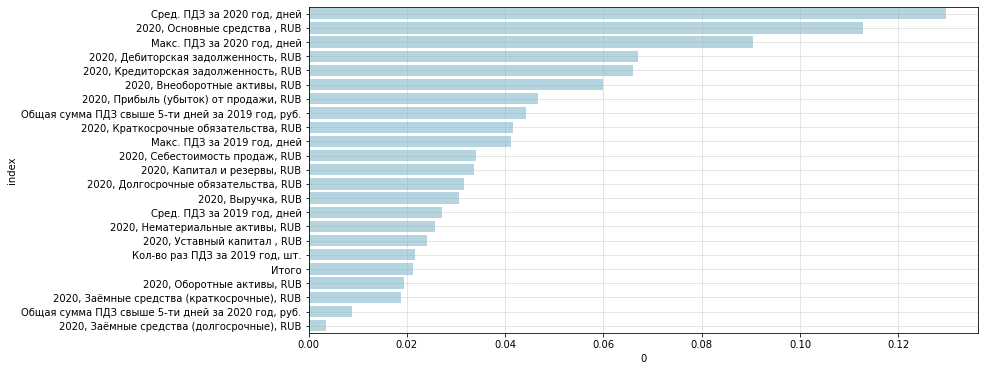

In [ ]:
# Как посмтроить feature importance
features_importance = forest.best_estimator_.feature_importances_ # обратить внимание, если пользуемся GridSearchCV
df_features = pd.DataFrame(features_importance, features.columns)
df_features.sort_values(by=0, ascending=False, inplace=True)
df_features = df_features.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=df_features, x=0, y='index', color='lightblue')
plt.grid(alpha=0.4)
plt.show()

In [ ]:
predictor.ClassificationReport()

RandomForest :
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        56
           1       0.50      0.33      0.40         9

    accuracy                           0.86        65
   macro avg       0.70      0.64      0.66        65
weighted avg       0.84      0.86      0.85        65

*******************************************
LogisticRegression :
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        56
           1       0.25      0.44      0.32         9

    accuracy                           0.74        65
   macro avg       0.57      0.62      0.58        65
weighted avg       0.81      0.74      0.77        65

*******************************************


### Обратный инжиниринг для 2020 г.

In [ ]:
# Ну а сейчас возьмем те же колонки в дф за 2020 г:
twenty_algo = twenty[feature_equalizer_20_19(features)] # теперь осталось только прогнать алгоритм
forest_2020_more_365 = forest.predict(twenty_algo) # вызываем метод "предикт" у обученного Леса, который мы выше сохранили в соотв. переменную

twenty['ПДЗ более 365'] = forest_2020_more_365
twenty[['Наименование ДП', 'ПДЗ более 365']].head(10) # итоговый сет с предсказанными просрочками свыше 365 для каждого контрагента в 2020

Наименование ДП  ПДЗ более 365
0                0              1
1                1              0
2                2              0
3                3              0
4                4              0
5                5              1
6                6              0
7                7              0
8                8              0
9                9              0

## ПДЗ 91-365


По предыдущему опыту мы знаем, что лучше показали себя признаки с умеренной корреляцией (>= 0.3). Поэтому дальше будем работать с ними, а модель с корреляциями ~0.1 была отброшена.

In [ ]:
# Подготавливаем умеренно коррелирующие признаки. + отбросим младшие сроки ПДЗ
df_model_91_365 = diag.drop(['2020, Прибыль (убыток) от продажи, RUB', '2020, Прибыль (убыток) до налогообложения , RUB', '2020, Заёмные средства (краткосрочные), RUB',
                             '2020, Долгосрочные обязательства, RUB', '2020, Заёмные средства (долгосрочные), RUB', '2020, Основные средства , RUB', 'Статус', 'Оценка потенциала контрагента 1, руб.',
                             'Кол-во раз ПДЗ за 2020 год, шт.', 'Кол-во раз ПДЗ за 2019 год, шт.', 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
                             'ПДЗ более 365'], axis=1)
df_model_91_365_strong = df_model_91_365[['ПДЗ 91-365', 'Итого', '2020, Кредиторская задолженность, RUB', 'Сред. ПДЗ за 2020 год, дней',
                                          'Макс. ПДЗ за 2020 год, дней', 'Макс. ПДЗ за 2019 год, дней']]
df_model_91_365_strong.head(1)

ПДЗ 91-365  Итого  2020, Кредиторская задолженность, RUB  \
0           1    5.0                           3.333520e+09   

   Сред. ПДЗ за 2020 год, дней  Макс. ПДЗ за 2020 год, дней  \
0                          6.4                           10   

   Макс. ПДЗ за 2019 год, дней  
0                            0

In [ ]:
# Дальше точно такой же алгоритм, как и для предыдущего срока ПДЗ:
features = df_model_91_365_strong.drop('ПДЗ 91-365', axis=1) # признаки итогового датасета
target = df_model_91_365_strong['ПДЗ 91-365'] # целевой столбец

In [ ]:
predictor = Predictor(features, target, test_size=0.2)
forest = predictor.RandomForest()

Точность СлучайногоЛеса: 0.8615384615384616


In [ ]:
regression = predictor.LogisticReg()

Точность логистической регрессии: 0.8615384615384616


In [ ]:
predictor.ClassificationReport()

RandomForest :
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        56
           1       0.50      0.22      0.31         9

    accuracy                           0.86        65
   macro avg       0.69      0.59      0.62        65
weighted avg       0.83      0.86      0.84        65

*******************************************
LogisticRegression :
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        56
           1       0.00      0.00      0.00         9

    accuracy                           0.86        65
   macro avg       0.43      0.50      0.46        65
weighted avg       0.74      0.86      0.80        65

*******************************************


### Обратный инжиниринг для 2020 г.

In [ ]:
twenty_algo = twenty[feature_equalizer_20_19(features)] # теперь осталось только прогнать алгоритм
forest_2020_91_365 = forest.predict(twenty_algo) # вызываем метод "предикт" у обученного Леса, который мы выше сохранили в соотв. переменную

twenty['ПДЗ 91-365'] = forest_2020_91_365
twenty[['Наименование ДП', 'ПДЗ 91-365']].head(10)

Наименование ДП  ПДЗ 91-365
0                0           0
1                1           0
2                2           0
3                3           0
4                4           0
5                5           1
6                6           1
7                7           0
8                8           0
9                9           0

## ПДЗ 31-90

Из диаграммы видим, что корреляция признаков с этим таргетом везде меньше 0.3. Таким образом будем строить модель предсказаний на более менее релевантных признаках, скажем ~0.2. Не факт, что результат получится оптимальный, но общее представление будет получено. Всегда можно в случае надобности добавить еще признаков и пересчитать предсказания. 

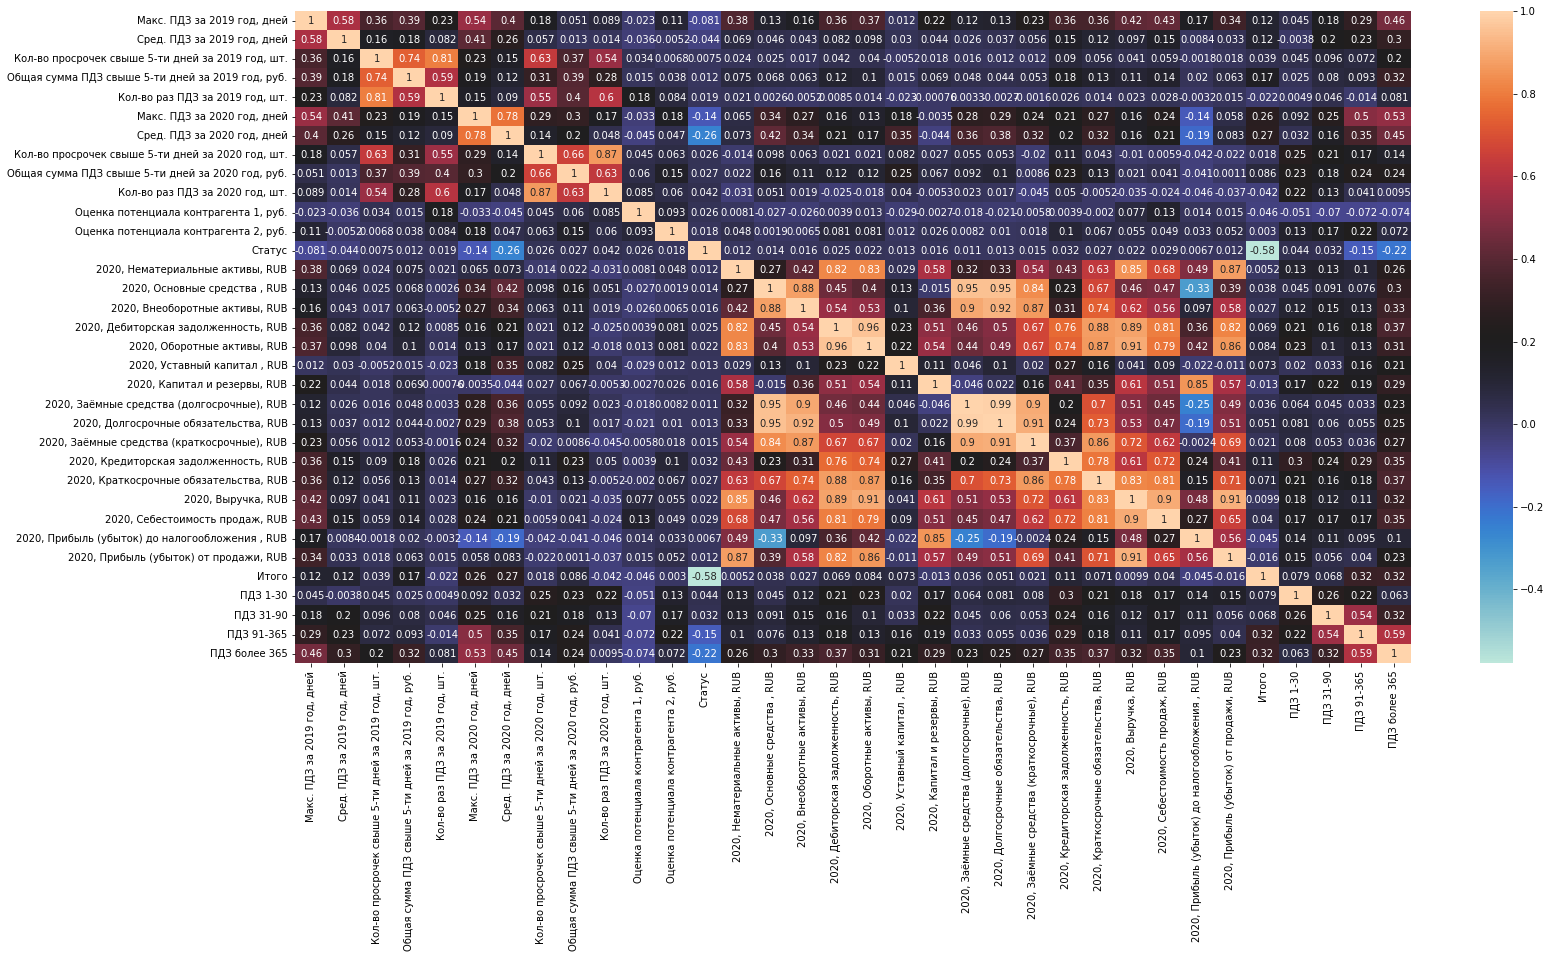

In [ ]:
plt.figure(figsize=(25, 12))
sns.heatmap(diag.corr(), annot=True, cmap='icefire')
plt.show()

In [ ]:
# Убираем нерелевантные признаки и все, что связано с ПДЗ младших сроков
df_model_31_90 = diag[['ПДЗ 31-90', '2020, Кредиторская задолженность, RUB', '2020, Капитал и резервы, RUB', 'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
                       'Макс. ПДЗ за 2020 год, дней', 'Сред. ПДЗ за 2019 год, дней']]
df_model_31_90.head(1)

ПДЗ 31-90  2020, Кредиторская задолженность, RUB  \
0          0                           3.333520e+09   

   2020, Капитал и резервы, RUB  \
0                  6.881321e+09   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  \
0                                                  4   

   Макс. ПДЗ за 2020 год, дней  Сред. ПДЗ за 2019 год, дней  
0                           10                          0.0

In [ ]:
# Дальше точно такой же алгоритм, как и для предыдущего срока ПДЗ:
features = df_model_31_90.drop('ПДЗ 31-90', axis=1) # признаки итогового датасета
target = df_model_31_90['ПДЗ 31-90'] # целевой столбец

In [ ]:
predictor = Predictor(features, target, test_size=0.3)
forest = predictor.RandomForest()

Точность СлучайногоЛеса: 0.8877551020408163


In [ ]:
regression = predictor.LogisticReg()

Точность логистической регрессии: 0.9081632653061225


In [ ]:
predictor.ClassificationReport()

RandomForest :
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        88
           1       0.00      0.00      0.00        10

    accuracy                           0.89        98
   macro avg       0.45      0.49      0.47        98
weighted avg       0.81      0.89      0.84        98

*******************************************
LogisticRegression :
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        88
           1       0.67      0.20      0.31        10

    accuracy                           0.91        98
   macro avg       0.79      0.59      0.63        98
weighted avg       0.89      0.91      0.89        98

*******************************************


### Обратный инжиниринг для 2020 г.

In [ ]:
twenty_algo = twenty[feature_equalizer_20_19(features)] # теперь осталось только прогнать алгоритм
forest_2020_31_90 = forest.predict(twenty_algo) # вызываем метод "предикт" у обученного Леса, который мы выше сохранили в соотв. переменную

twenty['ПДЗ 31-90'] = forest_2020_31_90
twenty[['Наименование ДП', 'ПДЗ 31-90']].head(25) # невероятные контрагенты, всего 1 из верхних 25 просрочил в данном временном интервале!

Наименование ДП  ПДЗ 31-90
0                 0          0
1                 1          0
2                 2          0
3                 3          0
4                 4          0
5                 5          0
6                 6          0
7                 7          0
8                 8          0
9                 9          0
10               10          1
11               11          0
12               12          0
13               13          0
14               14          0
15               15          0
16               16          0
17               17          0
18               18          0
19               19          0
20               20          0
21               21          0
22               22          0
23               23          0
24               24          0

In [ ]:
twenty[['Наименование ДП', 'ПДЗ 31-90']]['ПДЗ 31-90'].value_counts() # только каждый 52-й допустил бы эту просрочку с точки зрения алгоритма

0    521
1     10
Name: ПДЗ 31-90, dtype: int64

## ПДЗ 1-30

Здесь тоже будем отбирать признаки c корреляцией >=0.2

In [ ]:
df_model_1_30 = diag[['ПДЗ 1-30', '2020, Краткосрочные обязательства, RUB', '2020, Кредиторская задолженность, RUB', '2020, Оборотные активы, RUB',
                      '2020, Дебиторская задолженность, RUB', 'Кол-во раз ПДЗ за 2020 год, шт.', 'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
                      'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.']]
df_model_1_30.head(1)

ПДЗ 1-30  2020, Краткосрочные обязательства, RUB  \
0         0                            3.451186e+09   

   2020, Кредиторская задолженность, RUB  2020, Оборотные активы, RUB  \
0                           3.333520e+09                 6.170107e+09   

   2020, Дебиторская задолженность, RUB  Кол-во раз ПДЗ за 2020 год, шт.  \
0                          4.977055e+09                                5   

   Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.  \
0                                       2.229696e+06   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  
0                                                  4

Вот здесь масштабирование привело к существенному увеличению всех метрик

In [ ]:
# Как обычно подредактируем крупные масштабы
df_model_1_30[df_model_1_30.columns[1:5]] = df_model_1_30[df_model_1_30.columns[1:5]]/1e9
df_model_1_30['Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.'] = df_model_1_30['Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.']/1e9
df_model_1_30.head(1)

ПДЗ 1-30  2020, Краткосрочные обязательства, RUB  \
0         0                                3.451186   

   2020, Кредиторская задолженность, RUB  2020, Оборотные активы, RUB  \
0                                3.33352                     6.170107   

   2020, Дебиторская задолженность, RUB  Кол-во раз ПДЗ за 2020 год, шт.  \
0                              4.977055                                5   

   Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.  \
0                                            0.00223   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  
0                                                  4

In [ ]:
# Дальше точно такой же алгоритм, как и для предыдущего срока ПДЗ:
features = df_model_1_30.drop('ПДЗ 1-30', axis=1) # признаки итогового датасета
target = df_model_1_30['ПДЗ 1-30'] # целевой столбец

In [ ]:
predictor = Predictor(features, target, test_size=0.3)
forest = predictor.RandomForest()

Точность СлучайногоЛеса: 0.7857142857142857


In [ ]:
regression = predictor.LogisticReg()

Точность логистической регрессии: 0.8061224489795918


In [ ]:
predictor.ClassificationReport()

RandomForest :
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        78
           1       0.43      0.15      0.22        20

    accuracy                           0.79        98
   macro avg       0.62      0.55      0.55        98
weighted avg       0.73      0.79      0.74        98

*******************************************
LogisticRegression :
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        78
           1       0.60      0.15      0.24        20

    accuracy                           0.81        98
   macro avg       0.71      0.56      0.56        98
weighted avg       0.77      0.81      0.76        98

*******************************************


### Обратный инжиниринг для 2020 г.

In [ ]:
twenty_algo = twenty[feature_equalizer_20_19(features)] # теперь осталось только прогнать алгоритм
forest_2020_1_30 = forest.predict(twenty_algo) # вызываем метод "предикт" у обученного Леса, который мы выше сохранили в соотв. переменную

twenty['ПДЗ 1-30'] = forest_2020_1_30
twenty[['Наименование ДП', 'ПДЗ 1-30']].head(25) # как и было сказано в первой итерации, от столь коротких просрочек мало кто застрахован

Наименование ДП  ПДЗ 1-30
0                 0         1
1                 1         1
2                 2         1
3                 3         1
4                 4         1
5                 5         1
6                 6         1
7                 7         1
8                 8         1
9                 9         1
10               10         1
11               11         1
12               12         1
13               13         1
14               14         1
15               15         1
16               16         1
17               17         1
18               18         1
19               19         1
20               20         1
21               21         1
22               22         1
23               23         1
24               24         1

### Инеференс для конкретных компаний

Ниже покажу, как можно найти после работы алгоритмы конкретных к-агентов и посмотреть информацию только по ним. Рассмотрим тех уникумов, кто по мнению алгоритма не допустил бы ПДЗ 1-30 дней в 2020 г.

In [ ]:
# А сколько, по мнению нашего алгоритма в 20 г вообще без просрочк?
twenty['ПДЗ 1-30'].value_counts() # Всего 5 компаний! кто же эти герои??

twenty[twenty['ПДЗ 1-30'] == 0]['Наименование ДП'].values # героев нужно знать по номерам ))

array([ 52,  60, 340, 523, 528])

In [ ]:
twenty[twenty['Наименование ДП'].isin([52,  60, 340, 523, 528])] # посмотрим что вообще у них с показателями. Что ж, действительно похоже на правду

Наименование ДП  Макс. ПДЗ за 2019 год, дней  \
52                52                            4   
60                60                           91   
340              340                            0   
523              523                            0   
528              528                            0   

     Сред. ПДЗ за 2019 год, дней  \
52                           2.0   
60                          91.0   
340                          0.0   
523                          0.0   
528                          0.0   

     Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
52                                                   0   
60                                                   1   
340                                                  0   
523                                                  0   
528                                                  0   

     Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
52                                             0.00000   
60                                        108901.22293   
340                                            0.00000   
523                                            0.00000   
528                                            0.00000   

     Кол-во раз ПДЗ за 2019 год, шт.  Итого  Макс. ПДЗ за 2020 год, дней  \
52                                 3   30.0                           12   
60                                 1   80.0                           28   
340                                0   10.0                            0   
523                                0   10.0                            0   
528                                0   50.0                            0   

     Сред. ПДЗ за 2020 год, дней  \
52                           8.0   
60                          27.5   
340                          0.0   
523                          0.0   
528                          0.0   

     Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  ...  \
52                                                   1  ...   
60                                                   2  ...   
340                                                  0  ...   
523                                                  0  ...   
528                                                  0  ...   

     Кредиторская задолженность, RUB  Краткосрочные обязательства, RUB  \
52                     -5.511051e+08                     -8.528497e+08   
60                     -8.163727e+09                     -2.140423e+10   
340                     0.000000e+00                      0.000000e+00   
523                     0.000000e+00                      0.000000e+00   
528                     0.000000e+00                      0.000000e+00   

     Выручка, RUB  Себестоимость продаж, RUB  \
52  -3.185758e+09              -2.291904e+09   
60  -6.760121e+09              -6.347764e+09   
340  0.000000e+00               0.000000e+00   
523  0.000000e+00               0.000000e+00   
528  0.000000e+00               0.000000e+00   

     Прибыль (убыток) до налогообложения , RUB  \
52                               -3.890917e+08   
60                                2.165145e+09   
340                               0.000000e+00   
523                               0.000000e+00   
528                               0.000000e+00   

     Прибыль (убыток) от продажи, RUB  ПДЗ более 365  ПДЗ 91-365  ПДЗ 31-90  \
52                      -4.238287e+08              0           0          0   
60                      -4.123567e+08              1           1          0   
340                      0.000000e+00              0           1          0   
523                      0.000000e+00              0           1          0   
528                      0.000000e+00              0           1          0   

     ПДЗ 1-30  
52          0  
60          0  
340         0  
523         0  
528         0  

[5 rows x 96 columns]

C другой стороны, если нам нужно просто прогнать по модели какого-то одного к-агента, то делаем следующее

In [ ]:
# напишем функцию, как хороший кодер =)
def k_agent_inference(agent_number, df_from, algo):
  mister_exact = df_from[df_from['Наименование ДП'] == agent_number] # это будет датасет, содержащий лишь одну строку с к-агентом под
  # номером 52
  mister_exact_algo = mister_exact[feature_equalizer_20_19(features)] # теперь осталось только прогнать алгоритм
  forest_mister_exact = algo.predict(mister_exact_algo) # вызываем метод "предикт" у обученного Леса, который мы выше сохранили в соотв. переменную

  mister_exact['ПДЗ 1-30'] = forest_mister_exact
  return mister_exact # в итоге будем иметь все данные про него и последней строкой прогноз: допустил бы данный к-агент ПДЗ 1-30 или нет
  # вернем его на выход

In [ ]:
# прогоним к-агента под номером 52 через алгоритм и снова узнаем допустил бы он ПДЗ 1-30 в 2020 г или нет.
twenty_exper = twenty.drop(['ПДЗ более 365', 'ПДЗ 91-365', 'ПДЗ 31-90', 'ПДЗ 1-30'], axis=1) # для чистоты эксперимента, а то ведь эти столбцы были предсказаны ранее
mister_52 = k_agent_inference(agent_number=52, df_from=twenty_exper, algo=forest)
mister_52

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
52               52                            4                          2.0   

    Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
52                                                  0   

    Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
52                                                0.0   

    Кол-во раз ПДЗ за 2019 год, шт.  Итого  Макс. ПДЗ за 2020 год, дней  \
52                                3   30.0                           12   

    Сред. ПДЗ за 2020 год, дней  \
52                          8.0   

    Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  ...  \
52                                                  1  ...   

    Заёмные средства (долгосрочные), RUB  Долгосрочные обязательства, RUB  \
52                         -3.225930e+08                    -3.807051e+08   

    Заёмные средства (краткосрочные), RUB  Кредиторская задолженность, RUB  \
52                          -1.579261e+08                    -5.511051e+08   

    Краткосрочные обязательства, RUB  Выручка, RUB  Себестоимость продаж, RUB  \
52                     -8.528497e+08 -3.185758e+09              -2.291904e+09   

    Прибыль (убыток) до налогообложения , RUB  \
52                              -3.890917e+08   

    Прибыль (убыток) от продажи, RUB  ПДЗ 1-30  
52                     -4.238287e+08         0  

[1 rows x 93 columns]

# Предсказание факта ПДЗ на будущий год, по анализу данных за прошлые годы
Тут захотелось просто предсказать факт ПДЗ по датафрейму за 2020 год. В задании есть такой вопрос. Идея в том, что в датасете за 20 г. больше строк, а это всегда хорошо для любой модели машинного обучения.
Целевой столбец сделаем из "Кол-во раз ПДЗ за 2020 год, шт.", приняв за "1" факт любой просрочки (если просрочка была допущена хотя бы раз) и за "0", если просрочек не было.

Для повышения кол-ва строк можно было бы объеденить датафреймы, но я смотрел комментарии по заданию на ютьюб, и там было сказано, что это одни и те же контрегенты из года в год.

В качестве экономики мы сделаем такой же трюк, как в эксперементе №1, и оставим данные за последний год

ВАЖНО: однако теперь мы знаем, что не можем использовать данные ПДЗ за тот же год в обучении и прогнозах, поэтому придется немного переписать эксперимент, в соответствии с этой информацией.

In [ ]:
twenty.head(1)

Наименование ДП  Макс. ПДЗ за 2019 год, дней  Сред. ПДЗ за 2019 год, дней  \
0                0                            0                          0.0   

   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  \
0                                                  0   

   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  \
0                                                0.0   

   Кол-во раз ПДЗ за 2019 год, шт.  Итого  Макс. ПДЗ за 2020 год, дней  \
0                                0   10.0                           10   

   Сред. ПДЗ за 2020 год, дней  \
0                          6.4   

   Кол-во просрочек свыше 5-ти дней за 2020 год, шт.  ...  \
0                                                  4  ...   

   Кредиторская задолженность, RUB  Краткосрочные обязательства, RUB  \
0                    -6.010777e+08                     -5.872828e+08   

   Выручка, RUB  Себестоимость продаж, RUB  \
0  5.670574e+09               5.166668e+09   

   Прибыль (убыток) до налогообложения , RUB  \
0                               4.240873e+08   

   Прибыль (убыток) от продажи, RUB  ПДЗ более 365  ПДЗ 91-365  ПДЗ 31-90  \
0                      3.782783e+08              1           0          0   

   ПДЗ 1-30  
0         1  

[1 rows x 96 columns]

In [ ]:
# получим таргет из 'Кол-во раз ПДЗ за 2019 год, шт.':
def func(x):
  if x>0:
    x=1
  else:
    x=0
  return x
  
twenty_only_2019['target'] = twenty['Кол-во раз ПДЗ за 2019 год, шт.'].apply(func)

Далее интересно. Можно пойти 2мя путями:
1. Мы отбрасываем все, что связано с ПДЗ в нашей модели, оставляем только выше созданный таргет
2. Мы отбрасываем только ПДЗ по срокам, если предсказывали их выше

Во втором случае точность будет 100 %, в первом порядка 80%

Покажу прохождение алгоритма по 2му типу, мне кажется он честнее.

In [ ]:
drops = []
for i in list(twenty_only_2019.columns):
  if 'ПДЗ' in i:
    drops.append(i)
twenty_only_2019_no_pdz = twenty_only_2019.drop(drops, axis=1)

Если хотим пойти по пути 1, раскомментировать и запустить ячейку ниже. Верхнюю закомментировать и не запускать

In [ ]:
# drops = []
# for i in list(twenty_only_2019.columns):
#   if i in ['ПДЗ 1-30', 'ПДЗ 31-90', 'ПДЗ 91-365', 'ПДЗ более 365']:
#     drops.append(i)
# twenty_only_2019_no_pdz = twenty_only_2019.drop(drops, axis=1)

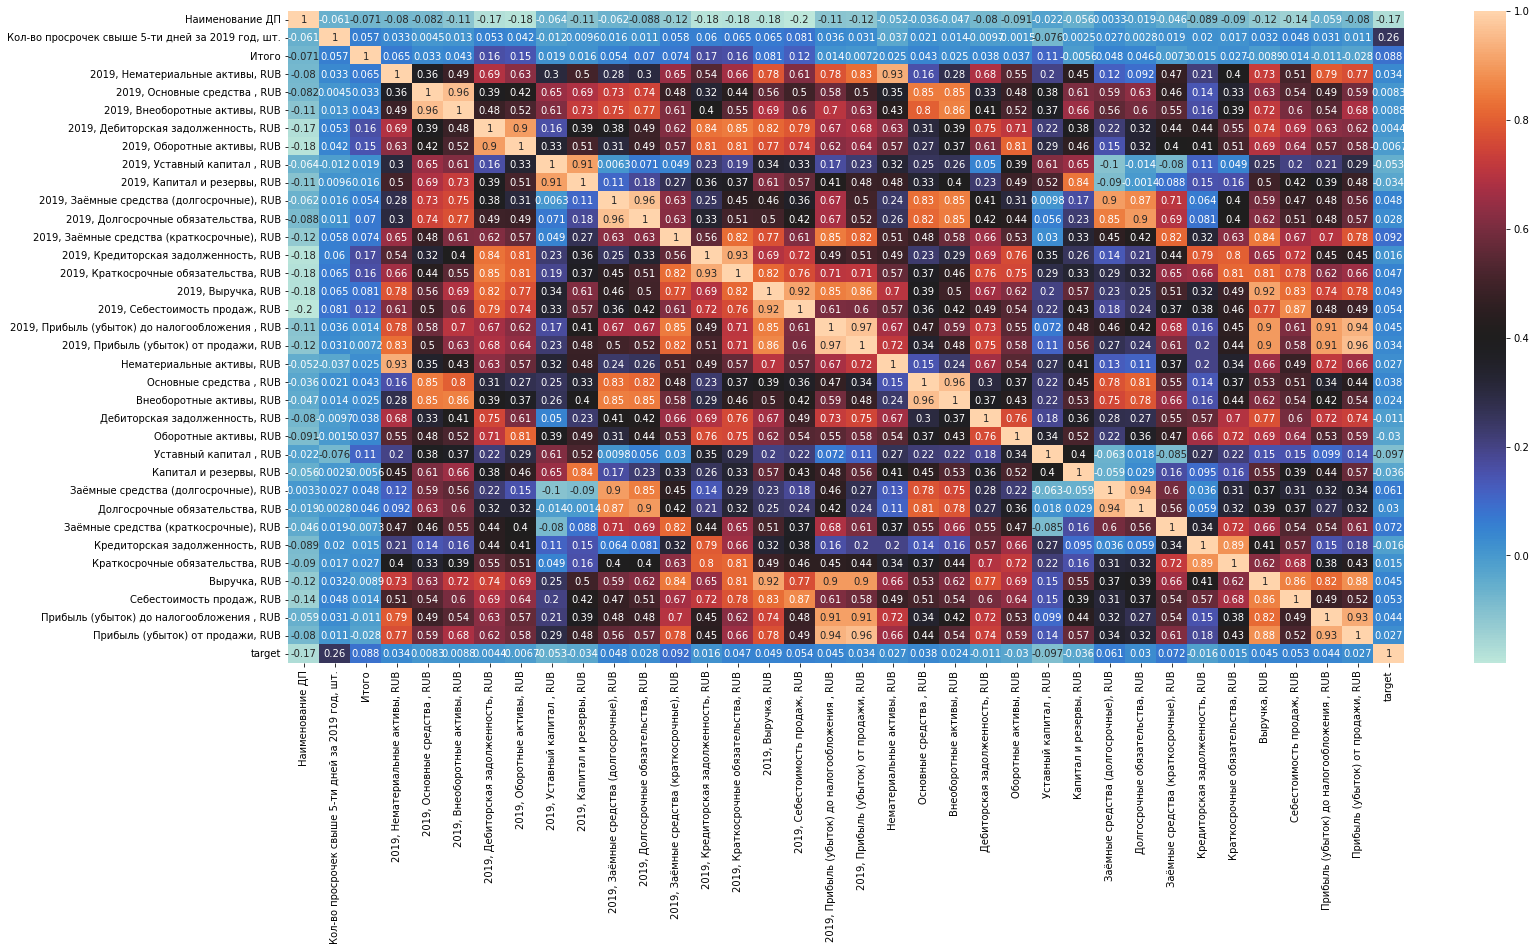

In [ ]:
# построим привычную диаграмму, чтобы иметь представление о взаимосвязанности признаков
plt.figure(figsize=(25, 12))
sns.heatmap(twenty_only_2019_no_pdz.corr(), annot=True, cmap='icefire')
plt.show()

In [ ]:
# Ничего нового, обучим просто по всем имеющимся признакам:
features = twenty_only_2019_no_pdz.drop(['target'], axis=1) # признаки итогового датасета
target = twenty_only_2019_no_pdz['target'] # целевой столбец

In [ ]:
predictor = Predictor(features, target, test_size=0.3)
forest = predictor.RandomForest()

Точность СлучайногоЛеса: 0.78125


In [ ]:
regression = predictor.LogisticReg()

Точность логистической регрессии: 0.425


In [ ]:
predictor.ClassificationReport()

RandomForest :
              precision    recall  f1-score   support

           0       0.67      0.84      0.74        61
           1       0.88      0.75      0.81        99

    accuracy                           0.78       160
   macro avg       0.78      0.79      0.78       160
weighted avg       0.80      0.78      0.78       160

*******************************************
LogisticRegression :
              precision    recall  f1-score   support

           0       0.29      0.34      0.31        61
           1       0.54      0.47      0.51        99

    accuracy                           0.42       160
   macro avg       0.41      0.41      0.41       160
weighted avg       0.44      0.42      0.43       160

*******************************************


## Предсказания на датасете за следующий год:
Осталось только посмотреть какая будет точность предсказаний этого обученного алгоритма на датасете за 2021 г.

In [ ]:
twentyone_dinamics['Итого'] = twentyone_dinamics['Итого'].fillna(0) # убираем нули из сумм факторов
twentyone_dinamics_algo = twentyone_dinamics[feature_equalizer_19_20(features)] # оставляем только нужные колонки, с пом. функции уравнителя фичей
forest_yes_no = forest.predict(twentyone_dinamics_algo) # находим предсказания
regression_yes_no = regression.predict(twentyone_dinamics_algo)

In [ ]:
# получим ground truth 20 года
def func(x):
  if x>0:
    x=1
  else:
    x=0
  return x
  
twentyone_dinamics['target'] = twentyone_dinamics['Кол-во раз ПДЗ за 2020 год, шт.'].apply(func)

In [ ]:
# сравним этот ground truth и значения полученные с помощью алгоритма
accuracy_score(twentyone_dinamics['target'].values, forest_yes_no) # 80% точности (если пойти по пути 1, то точность будет 100%)

0.803076923076923

In [ ]:
# Построим классификационный отчет:
dicto = {'RandomForest': forest_yes_no, 'LogisticRegression': regression_yes_no}
for i in dicto:
    print(i, ':')
    print(classification_report(twentyone_dinamics['target'].values, dicto[i]))
    print('*******************************************')

RandomForest :
              precision    recall  f1-score   support

           0       0.56      0.87      0.68        78
           1       0.95      0.78      0.86       247

    accuracy                           0.80       325
   macro avg       0.75      0.83      0.77       325
weighted avg       0.86      0.80      0.82       325

*******************************************
LogisticRegression :
              precision    recall  f1-score   support

           0       0.27      0.55      0.36        78
           1       0.79      0.52      0.62       247

    accuracy                           0.53       325
   macro avg       0.53      0.53      0.49       325
weighted avg       0.66      0.53      0.56       325

*******************************************


# Вербальная проверка логики того, что мы только что сделали:
Итак, правильная ли логика? Мы не можем принимать в учет актуальный год при тренировке алгоритма. Ок, мы алгоритм тренировали на данных за 2019 год. Таргет взяли как факт просрочки тоже за 19 год, но это не критично, так и должно быть, при обучении модель должна видеть Ground Truth. Следом мы взяли те же колонки(фичи), только с данными за 20 год и предсказали на них факт просрочки. Далее сравнили предсказания и истинные значения 20 года В итоге: учим на всем из 2019, предсказываем на всем из 2020. А кол-ва просрочек за 2021 год у нас нет.

По мне все логично.

# Алгоритм в том случае, если к нам приходит новый контрагент


In [ ]:
droplist = []
for i in list(twentyone_dinamics.columns):
  if 'ПДЗ' in i:
    droplist.append(i)
twentyone_only_2020_off_pdz = twentyone_dinamics.drop(droplist, axis=1) # допустим к нам пришел совершенно новый список к-агентов и мы знаем по нему только эконом. за прошлый год,
# про ПДЗ ничего не знаем
twentyone_only_2020_off_pdz.drop(['Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
                                  'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.'], axis=1, inplace=True) # и про просрочки естественно
# не знаем тоже

twentyone_only_2020_off_pdz['Статус'] = twentyone_only_2020_off_pdz['Статус'].astype('category') # категоризируем "Статус"
twentyone_only_2020_off_pdz['Статус'] = twentyone_only_2020_off_pdz['Статус'].cat.codes
twentyone_only_2020_off_pdz.head(3)

Наименование ДП  Оценка потенциала контрагента 1, руб.  \
0                0                           3.715287e+06   
1                2                           0.000000e+00   
2                4                           1.963885e+07   

   Оценка потенциала контрагента 2, руб.  Статус  \
0                           3.715287e+06       1   
1                           1.592357e+07       1   
2                           1.008471e+07       1   

   2020, Нематериальные активы, RUB  2020, Основные средства , RUB  \
0                      2.332484e+06                   4.292052e+09   
1                      1.844459e+07                   1.063706e+09   
2                      3.477707e+05                   3.281919e+10   

   2020, Внеоборотные активы, RUB  2020, Дебиторская задолженность, RUB  \
0                    4.379874e+09                          4.977055e+09   
1                    1.301418e+09                          3.714420e+08   
2                    1.252995e+11                          1.860993e+10   

   2020, Оборотные активы, RUB  2020, Уставный капитал , RUB  ...  \
0                 6.170107e+09                  6.294000e+08  ...   
1                 7.537777e+08                  1.964459e+07  ...   
2                 2.405211e+10                  5.955414e+05  ...   

   Заёмные средства (долгосрочные), RUB  Долгосрочные обязательства, RUB  \
0                          0.000000e+00                    -3.240382e+07   
1                          0.000000e+00                    -7.768790e+06   
2                          2.567689e+10                     2.764752e+10   

   Заёмные средства (краткосрочные), RUB  Кредиторская задолженность, RUB  \
0                           0.000000e+00                    -7.465363e+08   
1                           0.000000e+00                     9.067898e+07   
2                          -2.124754e+10                     3.964669e+08   

   Краткосрочные обязательства, RUB  Выручка, RUB  Себестоимость продаж, RUB  \
0                     -7.139822e+08  1.270895e+09              -9.849701e+08   
1                      1.480739e+08 -2.035140e+08               4.816618e+08   
2                     -2.056601e+10  4.913023e+10               1.312169e+10   

   Прибыль (убыток) до налогообложения , RUB  \
0                               2.406644e+09   
1                              -6.164994e+08   
2                               7.020228e+10   

   Прибыль (убыток) от продажи, RUB  target  
0                      2.691588e+09       1  
1                     -7.703306e+08       1  
2                      3.397970e+10       1  

[3 rows x 38 columns]

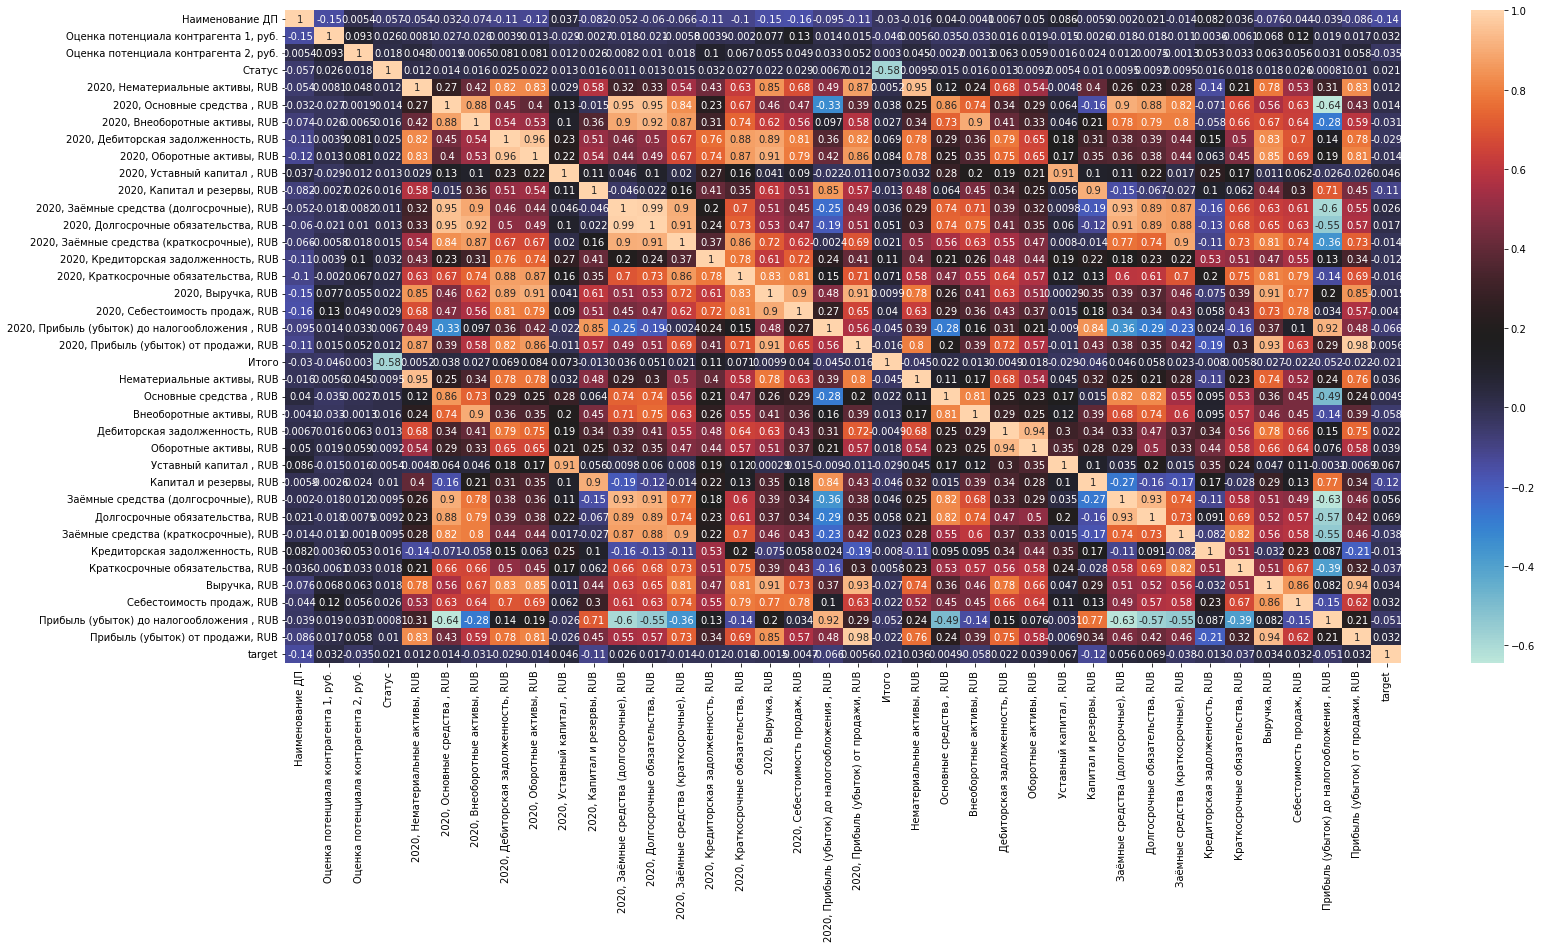

In [ ]:
plt.figure(figsize=(25, 12))
sns.heatmap(twentyone_only_2020_off_pdz.corr(), annot=True, cmap='icefire')
plt.show()
# ну и как нам из этого строить модель? Приходит на ум отмотать выше и посмотреть какие эконом признаки сильнее всего коррелируют с ПДЗ по предыдущим годам и на основании динамики
# этих признаков дать оценку

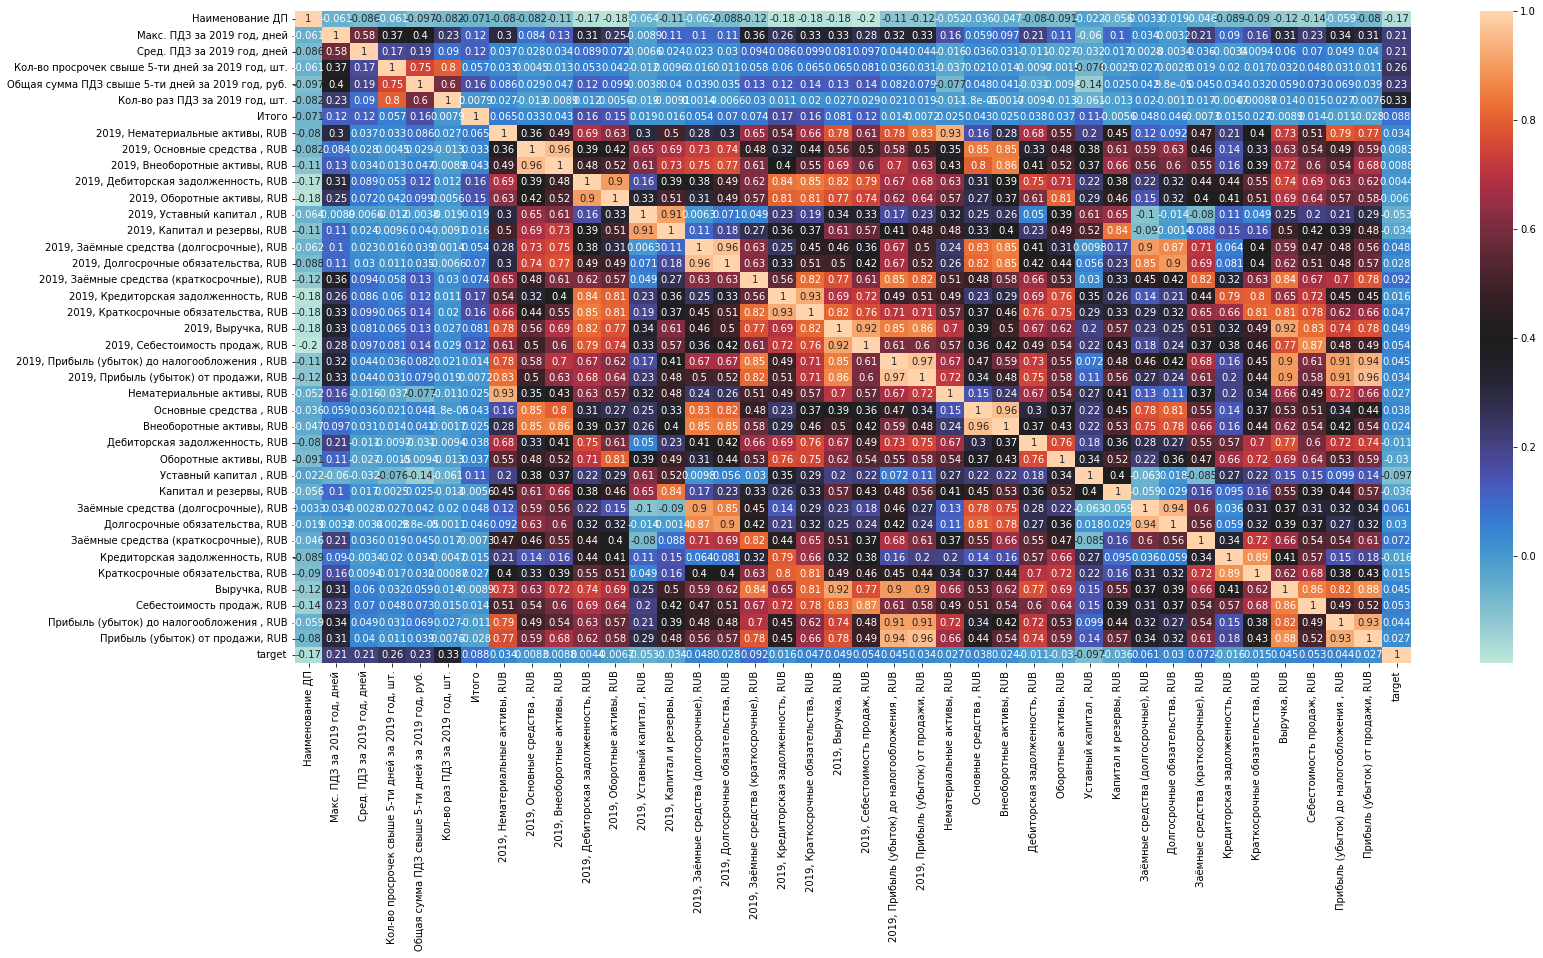

In [ ]:
# построим диаграмму по ранее подготовленному датасету за 2020 год с данными только за 2019 и эконом динамикой
plt.figure(figsize=(25, 12))
sns.heatmap(twenty_only_2019.corr(), annot=True, cmap='icefire')
plt.show()

# Ок, что я вижу: есть экономические признаки, которые неплохо коррелируют с "Макс. ПДЗ за 2019 год, дней". В учет будем брать только те, у которых черный цвет ячейки, что выше 0.3.
# Далее мы можем принять за "0" т. е. за несущественные просрочки значения столбца Макс. ПДЗ допустим меньше 30 дн. Т. е. если контрагент в 2019 году допустил макс. просрочку менее 30
# дней, то при таких эконом показателях мы полагаем, что контрагент хороший и просрочек как бы не допускает и присваиваем ему в таргете "0", в противном случае - "1".
# Далее учим алгоритм и новых контрагентов через него прогоняем, оставляя у них аналогичные экономические признаки. Таким образом будем иметь некоторый прогноз: хороший к-агент или нет.

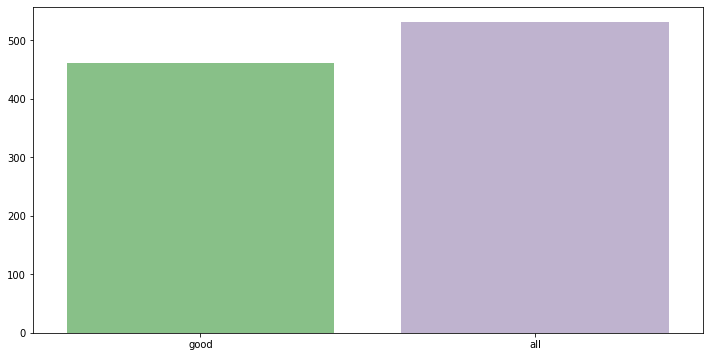

In [ ]:
good = len(twenty[twenty['Макс. ПДЗ за 2019 год, дней'] < 30])
all = len(twenty)
# 30 дней - много. ~4/5 всех к-агентов получаются хорошими. НО, можно сделать и так, тут ведь надо понимать: эти дни зависят от бизнеса, может бизнесу все, что выше 1 дня много =)
# Пойдем так: есть в дф столбец ПДЗ больше 5 дн. Воспользуемся этим, как своего рода маркером и будем далее разделять по принципу <=5

df = pd.DataFrame({'good': [good], 'all': [all]})
plt.figure(figsize=(12, 6))
sns.barplot(data=df, palette='Accent')
plt.show()

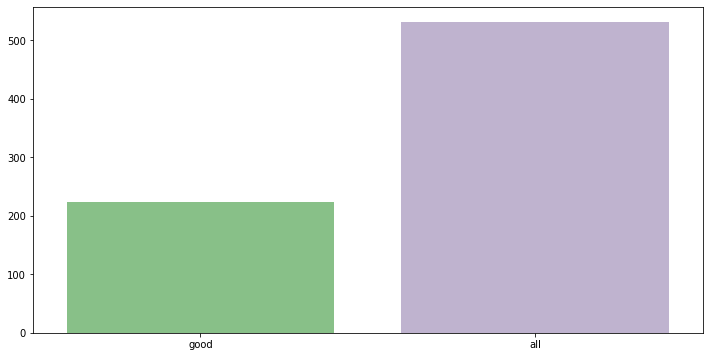

In [ ]:
good = len(twenty[twenty['Макс. ПДЗ за 2019 год, дней'] == 0])
all = len(twenty)
# Нет, ну, неплохие контрагенты! При <=5 получились - 3/5 хорошие. Берем жестко - строго 0 и все остальные должники. Тогда 2/5 остается хороших, 3/5 должники.
# Буду отталкиваться от такого разделения. Повторяю, это меняется быстро и легко в случае надобности.

df = pd.DataFrame({'good': [good], 'all': [all]})
plt.figure(figsize=(12, 6))
sns.barplot(data=df, palette='Accent')

plt.show()

In [ ]:
# получим наш таргет:
def func(x):
  if x == 0: # вот здесь можно задать дни, отделяющие "хороших" к-агентов от "плохих"
    x=0
  else:
    x=1
  return x
  
twenty_only_2019['target'] = twenty_only_2019['Макс. ПДЗ за 2019 год, дней'].apply(func)
twenty_only_2019[['target', 'Макс. ПДЗ за 2019 год, дней']] # похоже: там где "0", там "0" и "1" там, где все остальное

target  Макс. ПДЗ за 2019 год, дней
0         0                            0
1         0                            0
2         1                            7
3         0                            0
4         1                            2
..      ...                          ...
526       0                            0
527       0                            0
528       0                            0
529       0                            0
530       0                            0

[531 rows x 2 columns]

In [ ]:
# Так, осталось только выбрать нужные эконом. признаки и обучить алгоритм, как мы многократно делали выше.
# Нематериальные активы, дебиторская задолженность, заемные средства краткосрочные, краткосрочные обязательства, выручка, прибыль(убыток) до налогооблажения, прибыль(убыток) от продажи,
# Есть также хорошая корреляция по столбцам с динамикой. На будущее предполагаем, что какую-то динамику по новым контрагентам мы все же знаем (дальнейший расчет учитывает это).
# Если же нет, то просто убираем динамические показатели, алгоритм все пересчитает автоматически

df_model_new_blood = twenty_only_2019[['2019, Нематериальные активы, RUB', '2019, Дебиторская задолженность, RUB', '2019, Заёмные средства (краткосрочные), RUB',
                                       '2019, Краткосрочные обязательства, RUB', '2019, Выручка, RUB', '2019, Прибыль (убыток) до налогообложения , RUB',
                                       '2019, Прибыль (убыток) от продажи, RUB', 'Выручка, RUB', 'Прибыль (убыток) до налогообложения , RUB',
                                       'Прибыль (убыток) от продажи, RUB', 'Итого', 'target']]
df_model_new_blood.head(1)

2019, Нематериальные активы, RUB  2019, Дебиторская задолженность, RUB  \
0                      9.885987e+06                          3.692142e+09   

   2019, Заёмные средства (краткосрочные), RUB  \
0                                          0.0   

   2019, Краткосрочные обязательства, RUB  2019, Выручка, RUB  \
0                            3.577885e+09        3.234755e+10   

   2019, Прибыль (убыток) до налогообложения , RUB  \
0                                     3.603784e+09   

   2019, Прибыль (убыток) от продажи, RUB  Выручка, RUB  \
0                            3.658634e+09  5.670574e+09   

   Прибыль (убыток) до налогообложения , RUB  \
0                               4.240873e+08   

   Прибыль (убыток) от продажи, RUB  Итого  target  
0                      3.782783e+08   10.0       0

Ну и далее стандартный пайплайн с МО

In [ ]:
features = df_model_new_blood.drop('target', axis=1) # признаки итогового датасета
target = df_model_new_blood['target'] # целевой столбец

In [ ]:
predictor = Predictor(features, target, test_size=0.3)
forest = predictor.RandomForest() # ну... я конечно много и не ждал

Точность СлучайногоЛеса: 0.58125


In [ ]:
regression = predictor.LogisticReg()

Точность логистической регрессии: 0.55


In [ ]:
predictor.ClassificationReport() # получилась точность 0.57 у регрессии, это то же самое что пальцем в небо (если убрать динамику). Ну, оно и ожидалось нечто подобное.
# Если добавить динамику, то результат 0.55 у леса и регрессии, делаем вывод, что добавлять ее не особо то и нужно. Посмотрим еще что будет, если добавить совокупность факторов ("Итого")
# C "Итого" и с динамикой лес дал 0.58, регрессия - 0.55. С "Итого", без динамики Лес и регрессия дали по 0.56. В общем-то это топтание на месте.

# Если же включить все экономические признаки, скор будем хуже: Лес ~0.55, регрессиия ~0.41

RandomForest :
              precision    recall  f1-score   support

           0       0.43      0.30      0.35        61
           1       0.64      0.76      0.69        99

    accuracy                           0.58       160
   macro avg       0.53      0.53      0.52       160
weighted avg       0.56      0.58      0.56       160

*******************************************
LogisticRegression :
              precision    recall  f1-score   support

           0       0.40      0.36      0.38        61
           1       0.63      0.67      0.65        99

    accuracy                           0.55       160
   macro avg       0.51      0.51      0.51       160
weighted avg       0.54      0.55      0.54       160

*******************************************


## Проверка алгоритма
Посмотрим что удастся предсказать

In [ ]:
# получим таргет
def func(x):
  if x==0:
    x=0
  else:
    x=1
  return x
  
twentyone_only_2020_off_pdz['target'] = twentyone_dinamics['Кол-во раз ПДЗ за 2020 год, шт.'].apply(func)

In [ ]:
twentyone_only_2020_off_pdz['Итого'] = twentyone_only_2020_off_pdz['Итого'].fillna(0) 
twentyone_only_2020_off_pdz_algo = twentyone_only_2020_off_pdz[feature_equalizer_19_20(features)] # оставляем только нужные колонки, с пом. полученного выше списка
forest_yes_no = forest.predict(twentyone_only_2020_off_pdz_algo) # находим предсказания
regression_yes_no = regression.predict(twentyone_only_2020_off_pdz_algo)

In [ ]:
# Построим классификационный отчет:
dicto = {'RandomForest': forest_yes_no, 'LogisticRegression': regression_yes_no}
for i in dicto:
    print(i, ':')
    print(classification_report(twentyone_only_2020_off_pdz['target'].values, dicto[i]))
    print('*******************************************') # ну вот, как-то предсказали Лесом с точностью 0.63, что, признаться, выше, чем ожидалось

RandomForest :
              precision    recall  f1-score   support

           0       0.31      0.42      0.35        78
           1       0.79      0.70      0.74       247

    accuracy                           0.63       325
   macro avg       0.55      0.56      0.55       325
weighted avg       0.68      0.63      0.65       325

*******************************************
LogisticRegression :
              precision    recall  f1-score   support

           0       0.24      0.37      0.29        78
           1       0.76      0.63      0.69       247

    accuracy                           0.57       325
   macro avg       0.50      0.50      0.49       325
weighted avg       0.64      0.57      0.59       325

*******************************************


# Ответ на вопрос о важности предикторов




- ***Итого*** (совокупность 60-ти факторов)

Это то, что сразу пришло на ум, и было задействовано почти во всех построенных моделях, если не вообще во всех. Факторы действительно существенно помогают в оценке к-агента. Кстати, это было понятно почти сразу, еще на этапе визуализации при разведочном анализе в первой части данного исследования.

- ***Абсолютно все столбцы, связанные с ПДЗ***

Если у нас есть данные о просрочках к-агента за прошлые годы, обязательно нужно ими пользоваться, любыми! Если мы хотим предсказать что-то связанное с просрочками, то обязательно учитываем все, что можем найти об этих самых просрочках. Это подтверждалось в первую очередь сильнейшей корреляцией столбцов, описывающих ПДЗ между собой. Такие сильно взаимосвязанные данные улучшают и упрощают жизнь любой модели МО. Ну, и не будем забывать слова знаменитого К. Г. Юнга: "Лучший способ предсказать будущее поведение субъекта - это его прошлое поведение"
- ***Экономические столбцы: (ранжирование по силе корреляции, в скобках ее значение)***

Когда же мы лишены доступа к данным о ПДЗ, как в случае с предсказаниями для новых к-агентов, то ничего не остается, как внимательно изучать экономику. Вот, что было использовано в моделях в этом случае (от самого сильного к слабому влиянию):

- *Краткосрочные заемные средства (0.36)*

Средства для рассчета по краткосрочным обязательствам, как раз по всякого рода договорам. Стоит ли что-то еще писать, связь так же, абсолютно на лицо. На мой взгляд, если компания прибегает к большому кол-ву займов для рассчетов по краткосрочным обязательствам - это не самый благоприятный знак.

- *Прибыль (убыток) до налогообложения (динамика) (0.34)*

В принципе обе прибыли очень сильно взаимосвязаны, поэтому рассмотрим в совокупности. Тут ситуация очень схожа с выручкой. Ведь прибыль - это то, что осталось от выручки после возмещения затрат. Больше денег всегда хорошо =)

- *Прибыль (убыток) от продажи (0.33)*

- *Краткосрочные обязательства (0.33)*

Как много подлежит оплатить, насколько я понимаю в год. Чем выше, тем выше риски просрочек - тоже вполне логично.

- *Выручка (0.33)*

Проще говоря доход от реализации продукции. Элементарно: больше доход -> больше номинальная платежеспособность -> выше вероятность в срок рассчитаться с платежами.

- *Прибыль (убыток) до налогообложения (0.32)*

- *Дебиторская задолженность (0.31)*

Напрямую связан с ПДЗ, можно даже сказать, это то же самое другими словами. Если этот показатель высок, значит предприятие не особо добросовестно исполняет свои обязанности перед кредитором (тому, кому оно должно что-то, как правило, оплатить)

- *Выручка (динамика) (0.31)*

- *Прибыль (убыток) от продажи (динамика) (0.31)*

- *Нематериальные активы (0.3)*

Для меня это было интересно. В основном немат. активы это разного рода интеллектуальная собственность, как то: патенты, программы, исследования, изобретения, брэнды и т. п. Получается, что чем совершеннее компания в плане интеллектуальной собственности, тем ответственней она относится и к своим договорным обязательствам. Однако, немного подумав, я уведел здесь довольно очевидную связь. Ну ум пришли сравниние богатых интеллектуально компаний со своего рода дворянством, ниже чести которого не платить по счетам.

- *Кредиторская задолженность (~0.3)*

После первого этапа я выделил еще и этот показатель среди экономических, он тоже много где фигурировал. Это абсолютно прозрачно взаимосвязанный столбец, ведь возникает такая задолженность, когда дебитор просрочил оплату по обязательствам в срок. (Другими словами открыл для себя счетчик ПДЗ)